# Data Preprocessing for Machine Learning

This notebook outlines a general workflow for preprocessing data in a machine learning task.

In [1]:
## 1. Create Example Dataset

import pandas as pd
import numpy as np

# Create example data
data = {
    'age': [25, 30, np.nan, 35, 40, 28, 32, np.nan, 45, 50],
    'salary': [50000, 60000, 55000, np.nan, 80000, 52000, 58000, 60000, 90000, 100000],
    'department': ['HR', 'IT', 'IT', 'HR', 'Finance', 'Finance', 'IT', 'HR', 'Finance', 'IT'],
    'experience': [1, 5, 3, 10, 12, 4, 6, 2, 15, 20],
    'remote': ['Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'target': [200, 250, 230, 300, 400, 210, 270, 220, 450, 500]
}

df = pd.DataFrame(data)

# Introduce some inconsistent values
df.loc[1, 'department'] = ' it '
df.loc[3, 'department'] = ' Human Resources '
df.loc[4, 'remote'] = 'no'
df.loc[7, 'remote'] = 'yes'

df


,age,salary,department,experience,remote,target
0,25.0,50000.0,HR,1,Yes,200
1,30.0,60000.0,it,5,No,250
2,NaN,55000.0,IT,3,No,230
3,35.0,NaN,Human Resources,10,Yes,300
4,40.0,80000.0,Finance,12,no,400
5,28.0,52000.0,Finance,4,No,210
6,32.0,58000.0,IT,6,Yes,270
7,NaN,60000.0,HR,2,yes,220
8,45.0,90000.0,Finance,15,No,450
9,50.0,100000.0,IT,20,Yes,500


## 1. Load Data and Explore

- Check column types, missing values, and sample rows.

In [2]:
import pandas as pd

# Load data
#df_loaded = pd.read_csv('your_data.csv')

In [3]:
# Basic exploration
df.info()
df.sample(5)

print(f'{df.duplicated().sum()} total duplicates')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         8 non-null      float64
 1   salary      9 non-null      float64
 2   department  10 non-null     object 
 3   experience  10 non-null     int64  
 4   remote      10 non-null     object 
 5   target      10 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 612.0+ bytes
0 total duplicates


,age,salary,department,experience,remote,target
0,25.0,50000.0,HR,1,Yes,200
1,30.0,60000.0,it,5,No,250
2,NaN,55000.0,IT,3,No,230
3,35.0,NaN,Human Resources,10,Yes,300
4,40.0,80000.0,Finance,12,no,400


## 2. Handle Missing Values

In [4]:
# Drop missing values (optional)
# df.dropna(inplace=True)

cleaned_data = df.copy()
# Fill missing values
cleaned_data['age'] = cleaned_data['age'].fillna(cleaned_data['age'].mean())
cleaned_data['salary'] = cleaned_data['salary'].fillna(cleaned_data['salary'].median())

# Interpolation example (time series)
cleaned_data['experience'] = cleaned_data['experience'].interpolate(method='linear')

cleaned_data.head()

,age,salary,department,experience,remote,target
0,25.000,50000.0,HR,1,Yes,200
1,30.000,60000.0,it,5,No,250
2,35.625,55000.0,IT,3,No,230
3,35.000,60000.0,Human Resources,10,Yes,300
4,40.000,80000.0,Finance,12,no,400


## 3. Clean Inconsistent Data

In [5]:
# Strip whitespace and lowercase
cleaned_data['department'] = cleaned_data['department'].str.strip().str.lower()
cleaned_data['remote'] = cleaned_data['remote'].str.strip().str.lower()

# Replace inconsistent values
cleaned_data['department'] = cleaned_data['department'].replace({'human resources': 'hr'})
# use replace when replacing some elements in column

# Convert boolean column
cleaned_data['remote'] = cleaned_data['remote'].map({'yes': 1, 'no': 0})
# use map when changing all elements in column

# Check unique values
print(cleaned_data['department'].unique())
cleaned_data['remote'].unique()



['hr' 'it' 'finance']


array([1, 0])

## 4. Feature Exploration

- Detect correlations to **prioritise features**
- Spot outliers (can use preprocessing.RobustScaler() to scale)
- **Note:** If there are polynomial relationships, neural networks usually identify this during fitting (using activation Relu).
- **Note:** Coefficent of binary features for linear regression represents how much the outcome changes when we have 1 compared to 0
  - e.g. Sales = 5000 + (1500 * RunPromotion), RunPromotion=1 makes Sales increase by 1500

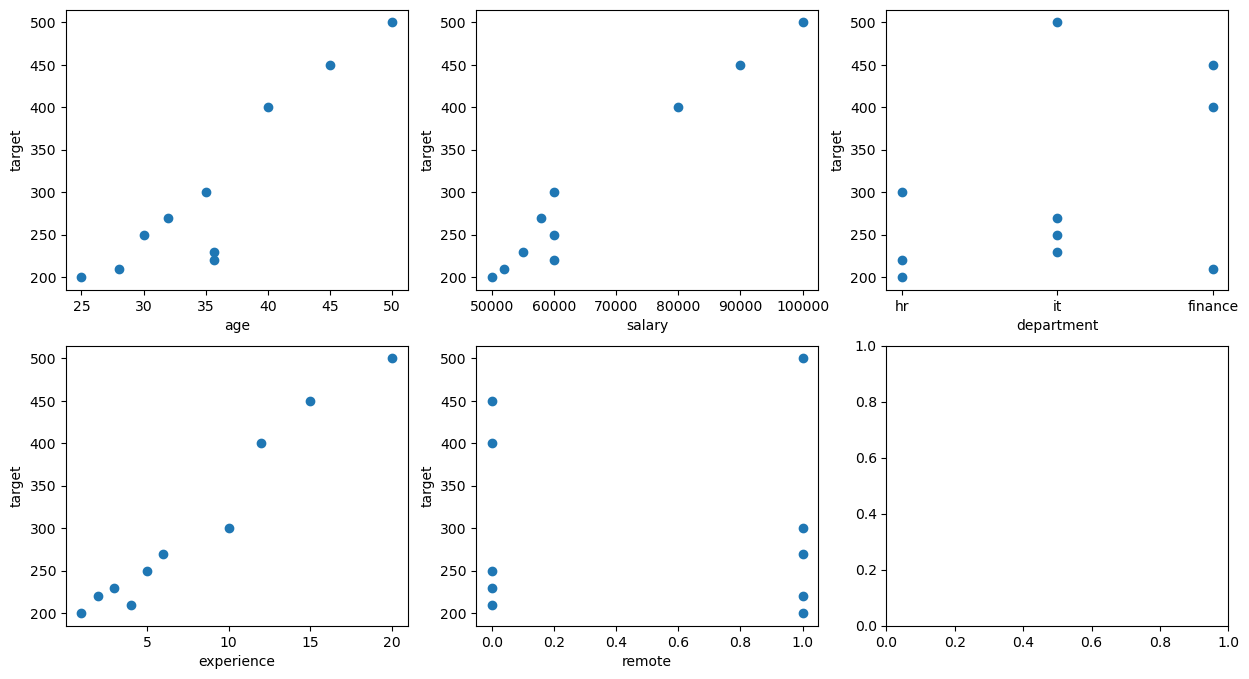

In [6]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(2,3, figsize=(15,8))
ax = ax.flatten()
for i, feature in enumerate(cleaned_data.columns[:-1]):
    ax[i].scatter(cleaned_data[feature], cleaned_data['target'])
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('target')

## 5.Encode Categorical Variables

In [7]:
cleaned_data = pd.get_dummies(cleaned_data, columns=['department'], drop_first=True, dtype=int)
cleaned_data

,age,salary,experience,remote,target,department_hr,department_it
0,25.000,50000.0,1,1,200,1,0
1,30.000,60000.0,5,0,250,0,1
2,35.625,55000.0,3,0,230,0,1
3,35.000,60000.0,10,1,300,1,0
4,40.000,80000.0,12,0,400,0,0
5,28.000,52000.0,4,0,210,0,0
6,32.000,58000.0,6,1,270,0,1
7,35.625,60000.0,2,1,220,1,0
8,45.000,90000.0,15,0,450,0,0
9,50.000,100000.0,20,1,500,0,1


## 6. Split Data

In [10]:
from sklearn.model_selection import train_test_split

X = cleaned_data.drop('target', axis=1)
y = cleaned_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Normalise/ Scale
- When features have a range of scales, we want to re-scale or normalise
- Both StandardScaler and MinMaxScaler are useful
  - Try StandardScaler first and then check validation metrics vs MinMaxScaler
  - Perform for all numeric columns in X training and test data separatly.
  - Do not perform on target

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)

## 8. Fit Model

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## 9. Validate and Predict

In [18]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

r2 = r2_score(y_test, y_pred) # proportion of variance in our model in the target that is explained by the features
mse = mean_squared_error(y_test, y_pred)# average squared differences between predicted and actual values
rmse = root_mean_squared_error(y_test, y_pred)# same as mse but same units as target

print(f"R^2: {r2:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")

R^2: 0.65, MSE: 3516.53, RMSE: 59.30


### Model Validation Interpretation

- **R² = 0.65** → 65% of the target’s variance is explained by the features; moderate predictive power.  
- **MSE = 3516.53** → average squared error; larger errors contribute more.  
- **RMSE = 59.30** → average prediction error ≈ 59 units; reasonable given target range (200–500).  

**Overall:** Model performs decently but leaves ~35% variance unexplained; could improve with more features or non-linear modeling.


## Logistic Regression Fit and Validate Example

In [24]:
from sklearn.linear_model import LogisticRegression

## needs classification data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#confusion_matrix

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# print("Confusion Matrix:\n", cm)


SyntaxError: invalid syntax (2067533894.py, line 3)

# Key Classification Metrics

## 1. Accuracy
- **Definition:** The most basic metric, representing the ratio of total correct predictions to the total number of predictions.  
- **Usefulness:** Good for balanced datasets but can be misleading if classes are imbalanced.

---

## 2. Precision
- **Definition:** Measures the accuracy of positive predictions.  
  Answers the question: *"Of all the instances the model predicted as positive, how many were actually positive?"*  
- **Formula:**  

$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

---

## 3. Recall (Sensitivity / True Positive Rate)
- **Definition:** Measures how well the model finds all the positive cases.  
  Answers the question: *"Of all the actual positive instances, how many did the model correctly identify?"*  
- **Formula:**  

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

---

## 4. F1 Score
- **Definition:** The harmonic mean of precision and recall.  
- **Formula:**  

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Usefulness:**  
  - Provides a single score that balances both precision and recall.  
  - Especially valuable for **imbalanced datasets**.  
  - A perfect F1 score is 1, the worst is 0.
